<a href="https://colab.research.google.com/github/johnantonn/deep-learning-practice/blob/main/shallow_mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image classification using the MNIST dataset
This notebook contains the "hello world" example for deep learning, i.e. learning a neural network model to predict the digit class of 28x28 images.

The training set is comprised of 60k samples while the test set includes 10k samples for model evaluation. The model is built using the Keras framework.

In [74]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [75]:
# load training and test data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Shape of training images: (60000, 28, 28)
Shape of training labels: (60000,)
Shape of test images: (10000, 28, 28)
Shape of test labels: (10000,)

Example digit:



<function matplotlib.pyplot.show(*args, **kw)>

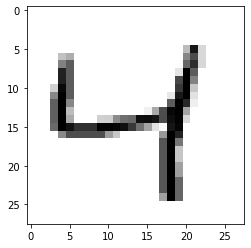

In [76]:
# print numpy array shapes
print(f"Shape of training images: {x_train.shape}")
print(f"Shape of training labels: {y_train.shape}" )
print(f"Shape of test images: {x_test.shape}" )
print(f"Shape of test labels: {y_test.shape}" )

import matplotlib.pyplot as plt

# show digit
print("\nExample digit:\n")
digit = x_train[2]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show

In [77]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# define a shallow 2-layer neural network model
model = Sequential(
    [
        Dense(512, activation="relu"),
        Dense(10, activation="softmax")
    ]
)

# compile the model
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [78]:
# preprocess the image/feature data
x_train = x_train.reshape((60000, 28*28))
x_train = x_train.astype("float32")/255
x_test = x_test.reshape((10000, 28*28))
x_test = x_test.astype("float32")/255

In [79]:
# train the model on 5 epochs
history = model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 11ms/step - loss: 0.2650 - accuracy: 0.9242
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1082 - accuracy: 0.9680
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0716 - accuracy: 0.9789
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0510 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 4s 10ms/step - loss: 0.0390 - accuracy: 0.9886


In [80]:
# evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0717 - accuracy: 0.9774
test_loss: 0.07172907888889313
test_accuracy: 0.977400004863739


In [81]:
# individual predictions
test_digits = x_test[0:5]
test_labels = y_test[0:5]
predictions = model.predict(test_digits)
for i in range(len(test_digits)):
  print(f"For digit {test_labels[i]} the model predicted: {predictions[i].argmax()}")

1/1 [==============================] - 0s 55ms/step
For digit 7 the model predicted: 7
For digit 2 the model predicted: 2
For digit 1 the model predicted: 1
For digit 0 the model predicted: 0
For digit 4 the model predicted: 4
